# Image classificator

https://docs.fast.ai/tutorial.vision.html

-U для update, если была установлена то обновит!

-qq для "quite" режима (без аутпута)


In [1]:
%pip install -Uqq fastai

Note: you may need to restart the kernel to use updated packages.


In [2]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)

In [11]:
# потому что в датасете название фоток с котами = с большой буквы
def label_func(f): return "Cat" if f[0].isupper() else "Dog"

files = get_image_files(path/ "images")
len(files)

7390

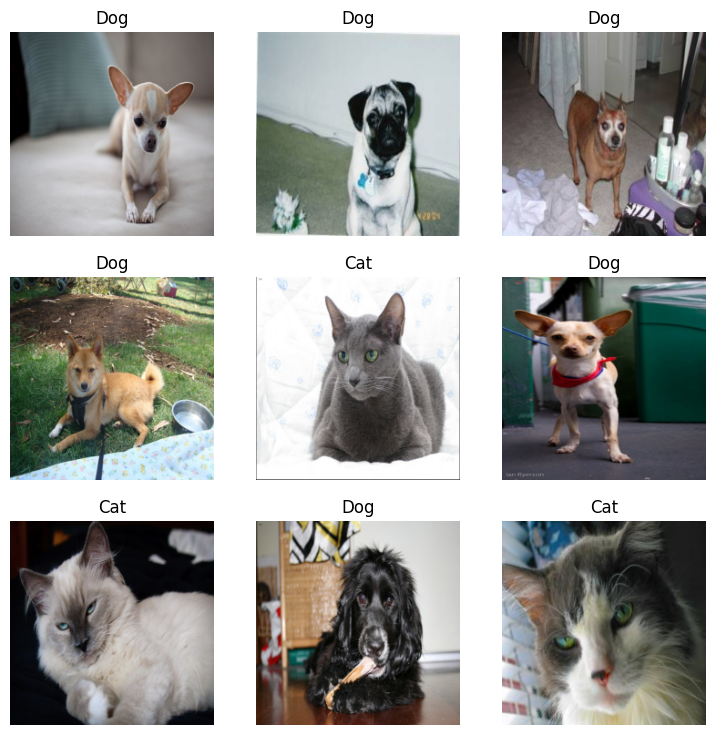

In [18]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize((224,224), method=ResizeMethod.Squish))

dls.show_batch()

In [21]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.164525,0.028104,0.007442,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.053276,0.029727,0.006089,00:28


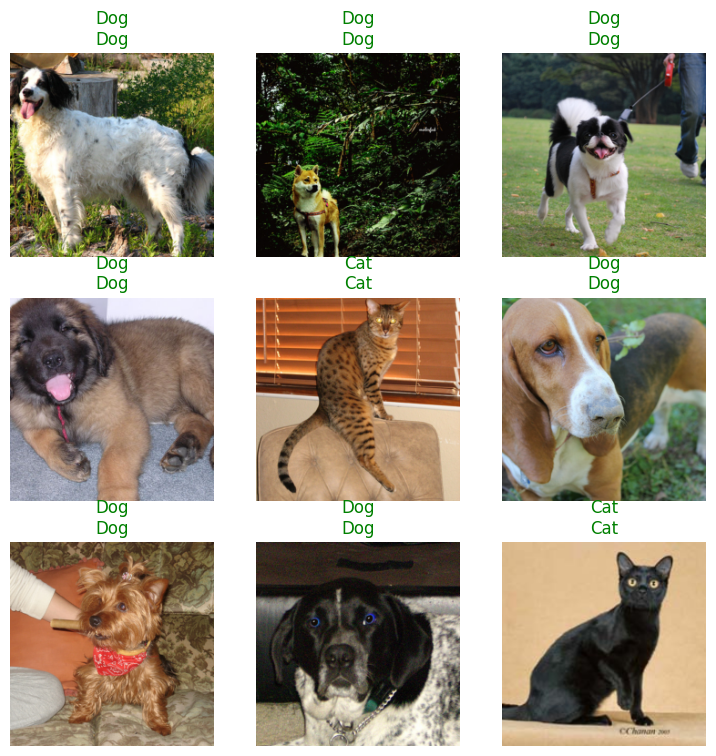

In [20]:
learn.show_results()